# YouTube Trending Videos Statistical Analysis

## INTRODUCTION

#### to be edited</b>
<b>https://www.kaggle.com/rsrishav/youtube-trending-video-dataset

In [1]:
# Importing libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp

%matplotlib inline

In [2]:
'''
Later on we can also remove the ones we wouldn't use
'''
# Importing dataset
data_gb = pd.read_csv("../data/GB_youtube_trending_data.csv",sep=",")  #uk  
data_fr = pd.read_csv("../data/FR_youtube_trending_data.csv",sep=",")  #france
data_us = pd.read_csv("../data/US_youtube_trending_data.csv",sep=",")  #usa 
data_ru = pd.read_csv("../data/RU_youtube_trending_data.csv",sep=",")  #russia
data_de = pd.read_csv("../data/DE_youtube_trending_data.csv",sep=",")  #germany 
data_ca = pd.read_csv("../data/CA_youtube_trending_data.csv",sep=",")  #canada   
data_kr = pd.read_csv("../data/KR_youtube_trending_data.csv",sep=",")  #southkorea   
data_jp = pd.read_csv("../data/JP_youtube_trending_data.csv",sep=",")  #japan
data_br = pd.read_csv("../data/BR_youtube_trending_data.csv",sep=",")  #brazil
data_mx = pd.read_csv("../data/MX_youtube_trending_data.csv",sep=",")  #mexico

In [3]:
'''
This can stay for now to easily see what are our properties in the dataset. We can delete it once
we are familiar with the dataset
'''
brief_list_col = []
brief_list = []

for i in range(0,len(data_gb.columns)):
    brief_list_col.append(data_gb.columns[i])
    brief_list.append(data_gb[data_gb.columns[i]][0])

brief_df = pd.DataFrame(brief_list_col,columns=["Property"])
brief_df.insert(1,"Output",brief_list,True)
brief_df

,Property,Output
0,video_id,J78aPJ3VyNs
1,title,I left youtube for a month and THIS is what ha...
2,publishedAt,2020-08-11T16:34:06Z
3,channelId,UCYzPXprvl5Y-Sf0g4vX-m6g
4,channelTitle,jacksepticeye
5,categoryId,24
6,trending_date,2020-08-12T00:00:00Z
7,tags,jacksepticeye|funny|funny meme|memes|jacksepti...
8,view_count,2038853
9,likes,353790


                                       **INDIVIDUAL PARTS**

### Data Wrangling

In [4]:
# Adding json file
gb_json = pd.read_json('../data/GB_category_id.json')

In [5]:
# Flattening json file to get rid of dict format
col_list = ["items","items_snippet"]

def flat_func(df,column):
    for column in col_list:
        flatten = pd.DataFrame(dict(df[column])).transpose()
        columns = [str(i) for i in flatten.columns]
        flatten.columns = [column + "_" + str(colname) for colname in columns]
        df = pd.concat([df,flatten],axis=1)
        df = df.drop(column,axis=1)
    return df

gb_flat = flat_func(gb_json,col_list)[["items_id","items_snippet_title"]]

In [6]:
# Adding trends next to categoryId's, could be useful for further analysis
'''
categoryId 29 is missing in JSON file so I am going to remove rows with categoryId 29 in order to run 
below code. There are only 3 rows available with categoryId 29, so shouldn't be a problem at all.
'''
drop_idx = data_gb[data_gb.categoryId == 29].index
data_gb = data_gb.drop(drop_idx)

trend = []
for i in data_gb["categoryId"]:
    for j in range(0,len(gb_flat)):
        if i == int(gb_flat["items_id"][j]):
            trend.append(gb_flat["items_snippet_title"][j])

data_gb.insert(6,"trend",trend)

### Data Analysis

In [15]:
'''
No null values.
'''
data_gb_stats.isnull().sum()

categoryId       0
trend            0
view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64

In [23]:
data_gb_numerical = data_gb[["view_count","likes","dislikes","comment_count"]]
data_gb_pivot_table = pd.pivot_table(data_gb_stats,values=(["view_count","likes","dislikes",
                                                            "comment_count"]),index="trend")
data_gb_pivot_table

,comment_count,dislikes,likes,view_count
trend,,,,
Autos & Vehicles,4329.756863,701.164706,52307.462745,8.338909e+05
Comedy,6870.574924,1213.715596,111475.672783,1.193184e+06
Education,6133.982456,881.210526,71836.038596,1.012919e+06
Entertainment,9604.756703,2413.411278,124177.778391,1.833418e+06
Film & Animation,7409.929448,1958.828221,90358.785276,1.700654e+06
Gaming,10844.448471,3629.408834,116784.161948,2.260163e+06
Howto & Style,4770.213303,1917.238532,66864.621560,1.051902e+06
Music,61977.308002,11160.409160,386101.302466,4.768394e+06
News & Politics,5719.312500,2022.440789,13347.588816,9.060529e+05


In [35]:
'''
Well actually, we don't need to set a thresh-hold for a minimum values since the lowest score is
equal to approximately four hundred million. (Note: we are looking trends.)
'''
print("minimum values;\n",data_gb_pivot_table.min())
print("\n\nmaximum values;\n",data_gb_pivot_table.max())

minimum values;
 comment_count      1773.617021
dislikes            402.063830
likes             13347.588816
view_count       504197.936170
dtype: float64


maximum values;
 comment_count    6.197731e+04
dislikes         1.116041e+04
likes            3.861013e+05
view_count       4.768394e+06
dtype: float64


In [161]:
'''
Apparently, there are strong positive correlations between;

view_count vs. likes
view_count vs. dislikes
view_count vs. comment_count

likes vs.dislikes
likes vs. comment_count

dislikes vs. comment_count
'''
data_gb_numerical.corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.934300,0.847083,0.801808
likes,0.934300,1.000000,0.797281,0.813243
dislikes,0.847083,0.797281,1.000000,0.754661
comment_count,0.801808,0.813243,0.754661,1.000000


c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

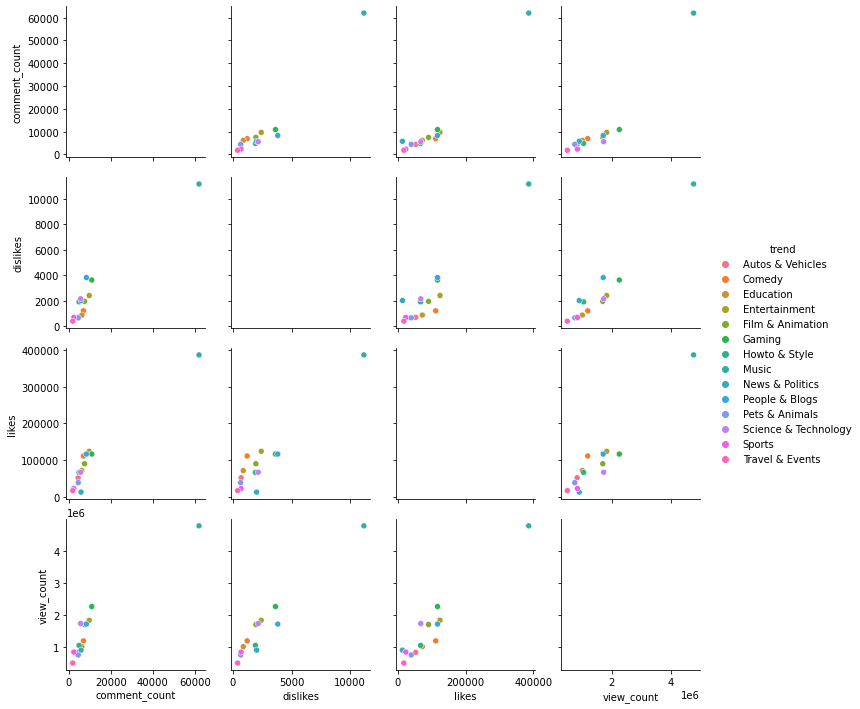

In [28]:
sns.pairplot(data_gb_pivot_table.reset_index(),hue="trend")

Possible hypothesis;

more popular the video more like/less dislike,
tbc